# The Analysis will only cover data from North America (Canada, US)
# Key Questions 
1. What are the trends in different professions?
2. What shift is observed after the pandemic?
3. Examine relationships between salary and other factors

## Load package and import dataset

In [1]:
# Load packages
library('tidyverse')
library('scales')
# import dataset
salaries <- read_csv('/kaggle/input/salaries-for-data-science-jobs/salaries.csv')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Rows: 136757 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): experience_level, employment_type, job_title, salary_currency, empl...
dbl (4): work_year, salary, salary_in_usd, remote_ratio

ℹ Use `spec()` to retrieve the full column speci

In [2]:
# Remove data from other countries (company not in North America)
salaries <- salaries %>% filter(salaries$company_location %in% c("US", "CA"))

## Examine the data

In [3]:
head(salaries)
glimpse(salaries)

work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
2025,MI,FT,Data Scientist,132600,USD,132600,US,100,US,M
2025,MI,FT,Data Scientist,102000,USD,102000,US,100,US,M
2025,SE,FT,Data Product Manager,260520,USD,260520,US,0,US,M
2025,SE,FT,Data Product Manager,140280,USD,140280,US,0,US,M
2025,SE,FT,Machine Learning Engineer,215000,USD,215000,US,0,US,M
2025,SE,FT,Machine Learning Engineer,136000,USD,136000,US,0,US,M


Rows: 128,075
Columns: 11
$ work_year          <dbl> 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 202…
$ experience_level   <chr> "MI", "MI", "SE", "SE", "SE", "SE", "SE", "SE", "SE…
$ employment_type    <chr> "FT", "FT", "FT", "FT", "FT", "FT", "FT", "FT", "FT…
$ job_title          <chr> "Data Scientist", "Data Scientist", "Data Product M…
$ salary             <dbl> 132600, 102000, 260520, 140280, 215000, 136000, 130…
$ salary_currency    <chr> "USD", "USD", "USD", "USD", "USD", "USD", "USD", "U…
$ salary_in_usd      <dbl> 132600, 102000, 260520, 140280, 215000, 136000, 130…
$ employee_residence <chr> "US", "US", "US", "US", "US", "US", "CA", "CA", "CA…
$ remote_ratio       <dbl> 100, 100, 0, 0, 0, 0, 0, 0, 100, 100, 100, 100, 100…
$ company_location   <chr> "US", "US", "US", "US", "US", "US", "CA", "CA", "CA…
$ company_size       <chr> "M", "M", "M", "M", "M", "M", "M", "M", "M", "M", "…


There are 128,075 rows and 11 columns. 

In [4]:
# statistical summary for salary (USD) and remote_ratio
summary(salaries[, names(salaries) %in% c("salary_in_usd", "remote_ratio")])

 salary_in_usd     remote_ratio   
 Min.   : 15000   Min.   :  0.00  
 1st Qu.:110300   1st Qu.:  0.00  
 Median :150000   Median :  0.00  
 Mean   :162295   Mean   : 21.05  
 3rd Qu.:200000   3rd Qu.:  0.00  
 Max.   :800000   Max.   :100.00  

Median Salary: 150,000 USD

In [5]:
salaries %>% count(experience_level)
salaries %>% count(employment_type)
salaries %>% count(remote_ratio)

experience_level,n
<chr>,<int>
EN,10977
EX,3146
MI,38335
SE,75617


employment_type,n
<chr>,<int>
CT,301
FL,4
FT,127466
PT,304


remote_ratio,n
<dbl>,<int>
0,101079
50,80
100,26916


#### Experience Level
- **EN**: Entry-level
- **MI**: Mid-level
- **SE**: Senior-level
- **EX**: Executive

#### Employment Type
- **FT**: Full-time
- **PT**: Part-time
- **CT**: Contract
- **FL**: Freelance

#### Remote Ratio
- **0**: No remote work
- **50**: Hybrid
- **100**: Full Remote work

We can see that most are Senior-level, full-time workers.  
Also, there are a lot more on-site workers than hybrid and remote workers. 

## Visualizations for insight

### Distribution of Salary

Warning message in geom_histogram(bin = 40, fill = "#4285F4", alpha = 0.4, size = 1.5):
“Ignoring unknown parameters: `bin`”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


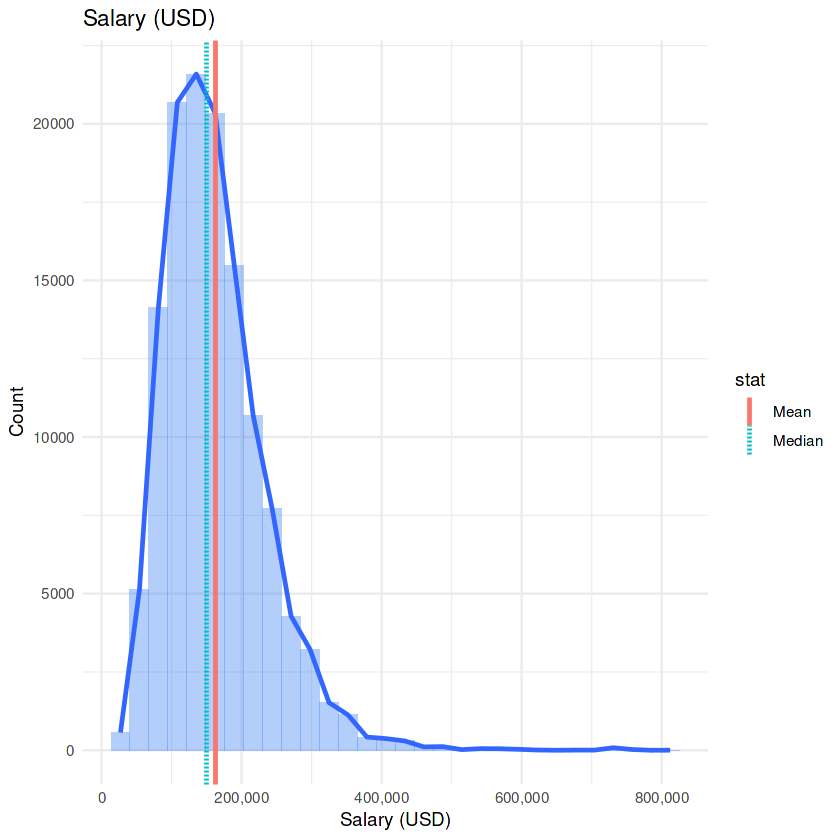

In [19]:
# median and mean salary
median_salary <- median(salaries$salary_in_usd)
mean_salary <- mean(salaries$salary_in_usd)

# data frame for vertical lines
vline_data <- data.frame(
    stat = c("Median", "Mean"),
    value = c(median_salary, mean_salary)
)

ggplot(data=salaries, aes(x=salary_in_usd)) +
    geom_histogram(bin=40, fill="#4285F4", alpha=0.4, size=1.5) + 
    geom_smooth(method="auto", stat="bin") + 
    scale_x_continuous(labels=scales::label_comma()) +
    geom_vline(data=vline_data, aes(xintercept=value, color=stat, linetype=stat), size=1) + 
    labs(title="Salary (USD)", x="Salary (USD)", y="Count") + 
    theme_minimal()

The graph shows the distribution of salaries.

### Salary by Year

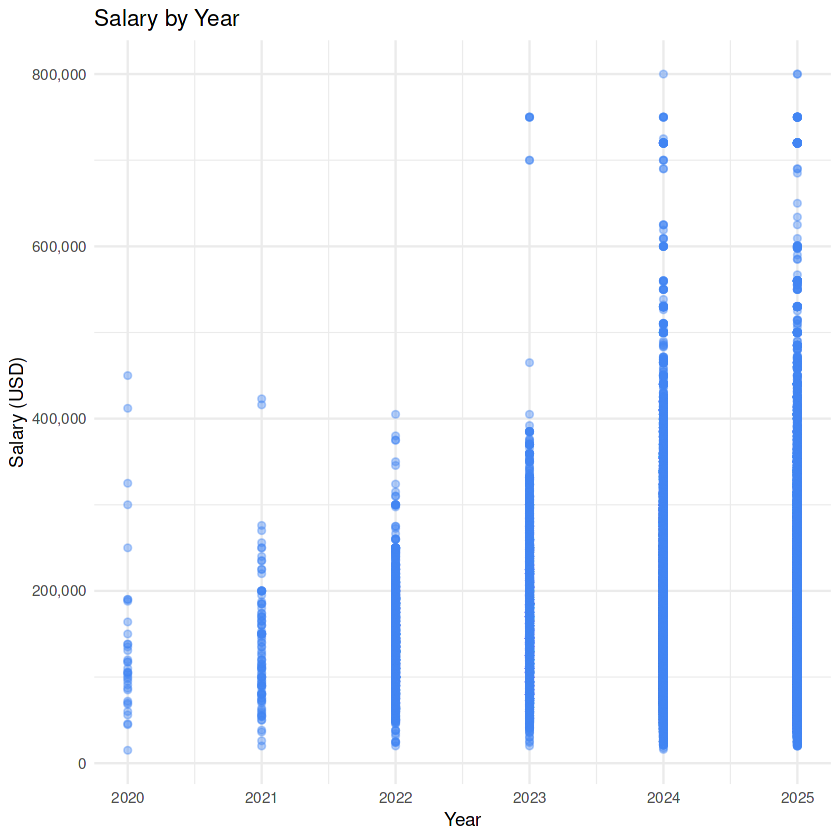

In [7]:
ggplot(data=salaries, aes(x=work_year, y=salary_in_usd)) +
    geom_point(color="#4285F4", alpha=0.4) +
    scale_y_continuous(labels = scales::label_comma()) +
    labs(title="Salary by Year", x="Year", y="Salary (USD)") + 
    theme_minimal()

We can examine the increase in salaries.   
Particularly, salaries increased dramatically in 2024.

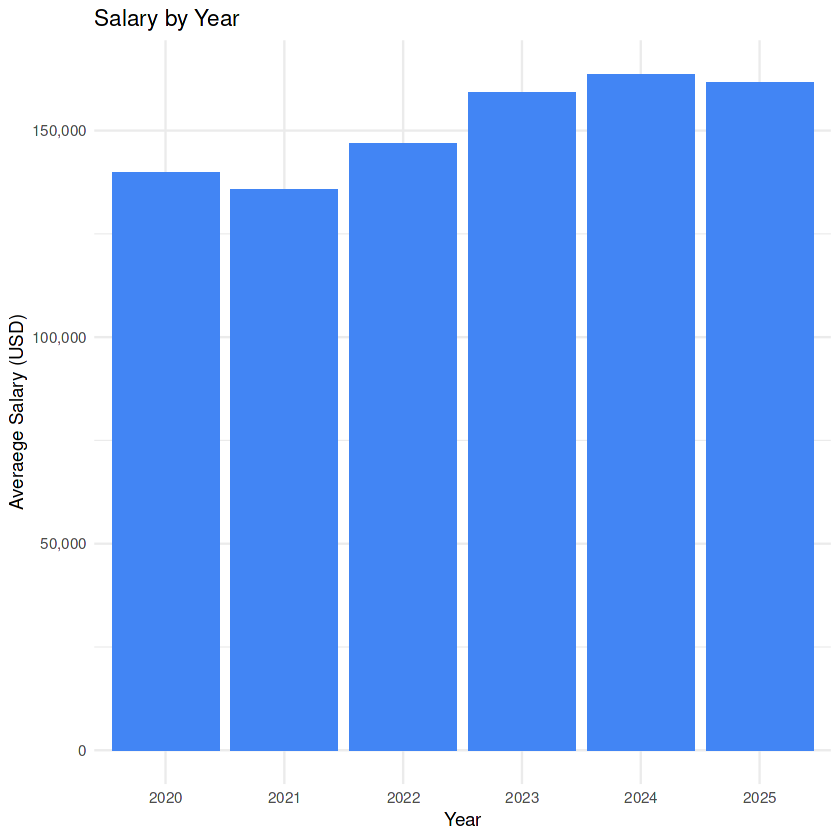

In [15]:
average_salary_by_year <- salaries %>%
    group_by(work_year) %>%
    summarize(mean_salary=mean(salary_in_usd))

ggplot(data=average_salary_by_year, aes(x=factor(work_year), y=mean_salary)) +
    geom_col(fill="#4285F4") +
    scale_y_continuous(label=scales::label_comma()) +
    labs(title="Salary by Year", x="Year", y="Averaege Salary (USD)") + 
    theme_minimal()

The Average Salary has also increased since 2021.

### Remote works after pandemic

`summarise()` has grouped output by 'work_year'. You can override using the
`.groups` argument.


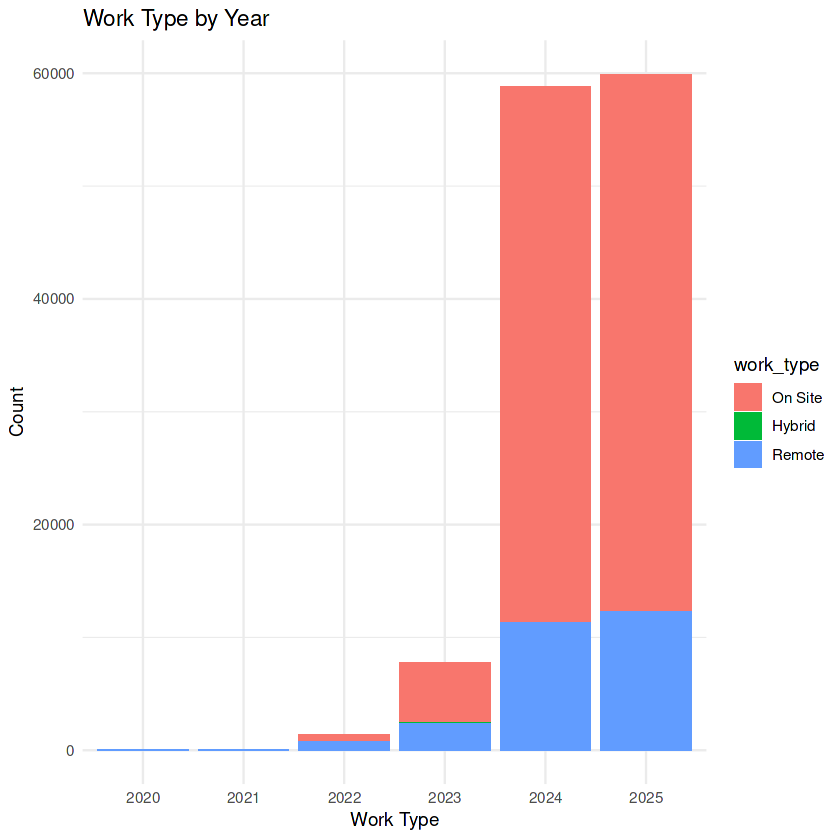

In [35]:
# remote_ratio to factor column
salaries <- salaries %>% 
    mutate(work_type = case_when(
        remote_ratio == 0 ~ "On Site",
        remote_ratio == 50 ~ "Hybrid",
        remote_ratio == 100 ~ "Remote"  # No TRUE because there is no "others" (no "else" thing needed here)
    ), work_type=factor(work_type, levels=c("On Site", "Hybrid", "Remote"))) 
# head(salaries)

# group by year and count frequency for each work type
work_type_by_year <- salaries %>%
    group_by(work_year, work_type) %>%
    summarize(count=n())

ggplot(data=work_type_by_year, aes(x=factor(work_year), y=count, fill=work_type)) +
    geom_col() +
    labs(title="Work Type by Year", x="Work Type", y="Count") +
    theme_minimal()

We can see the increase in remote workers from 2020, while on-site workers still take up the majority.   
We must take into account that the number of data points for each year is not the same.   
Which means that the graph above does not fully represent the number of workers in 2020.  

### Salary difference between job titles

In [40]:
glimpse(count(salaries, job_title))

Rows: 352
Columns: 2
$ job_title <chr> "AI Architect", "AI Content Writer", "AI Data Engineer", "AI…
$ n         <int> 253, 3, 2, 5, 170, 1509, 2, 4, 28, 2, 4, 26, 20, 3, 2, 1, 82…


There are 352 different job titles.   
We will extract top 10 job titles for analysis.

In [45]:
# Extracting top 10 job titles
top_ten_job_titles <- salaries %>% 
    count(job_title, sort=TRUE) %>%
    top_n(10)
top_ten_job_titles

Selecting by n


job_title,n
<chr>,<int>
Data Scientist,16435
Software Engineer,14979
Data Engineer,13781
Data Analyst,11344
Engineer,9394
Machine Learning Engineer,7956
Manager,6667
Analyst,4255
Research Scientist,3177


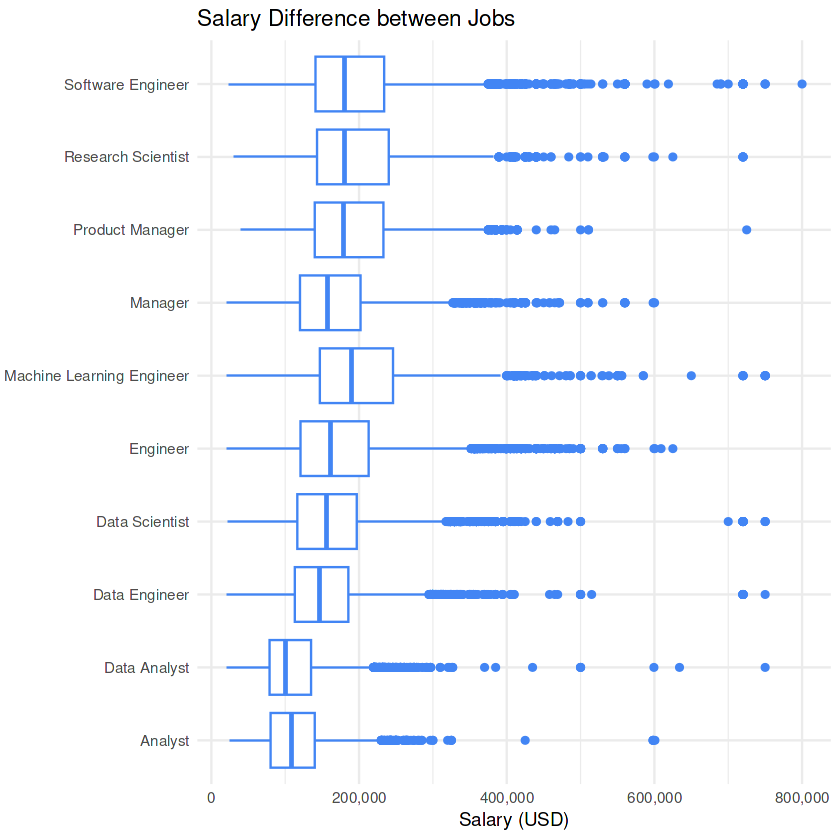

In [54]:
# applying filter to show only top_ten_jobs
top_ten_jobs_df <- salaries %>%
    filter(job_title %in% top_ten_job_titles$job_title)

ggplot(data=top_ten_jobs_df, aes(x=job_title, y=salary_in_usd)) +
    geom_boxplot(color="#4285F4") +
    coord_flip() + 
    scale_y_continuous(label=scales::label_comma()) +
    labs(title="Salary Difference between Jobs", x=NULL, y="Salary (USD)") +
    theme_minimal()

You can see the differences between jobs.  
While software engineers have the highest-paying salary, machine-learning engineers have the highest median salary.